In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn import datasets
iris=datasets.load_iris()

In [10]:
data=iris.data

In [14]:
data[0:4,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2]])

In [15]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
x=data
y=iris.target
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(x, y)
lr.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
#cross_val_score(lr,x,y,cv=5)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn,x,y,cv=5)

array([ 0.96666667,  0.96666667,  0.93333333,  0.96666667,  1.        ])

In [22]:
%pylab inline
from sklearn.model_selection import cross_val_score

Populating the interactive namespace from numpy and matplotlib


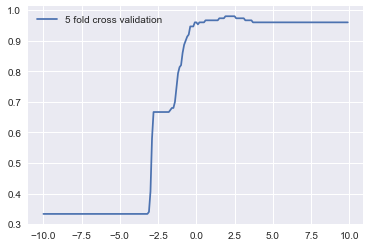

In [46]:
#%pylab inline
#from sklearn.model_selection import cross_val_score
#the regular range just work with integers
#np.arange works with floats
values=np.arange(-10, 10, 0.1)
cvalues=[10**(i) for i in values]
cv_scores=[]
for cvalue in cvalues:
    logreg=LogisticRegression(C=cvalue)
    score=np.mean(cross_val_score(logreg,x,y,cv=5)) # 5 fold cross-validation
    cv_scores.append(score)
plt.plot(values,cv_scores,label="5 fold cross validation")
plt.legend()

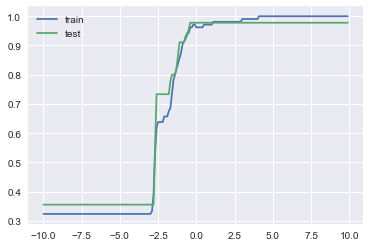

In [49]:
#use train_test_split and C value tuning to check for the best
#model complexity
from sklearn.model_selection import train_test_split
values=np.arange(-10, 10, 0.1)
cvalues=[10**(i) for i in values]
train_scores=[]
test_scores=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
for cvalue in cvalues:
    logreg=LogisticRegression(C=cvalue)
    logreg.fit(x_train,y_train)
    train_scores.append(logreg.score(x_train,y_train))
    test_scores.append(logreg.score(x_test,y_test))
    
plt.plot(values,train_scores,label="train")
plt.plot(values,test_scores,label="test")
plt.legend()